In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [2]:
# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\tracks'

# List to store the individual DataFrames
dfs = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        #print(file_path)
        df = pd.read_csv(file_path, header = 2)
        df = df.drop(0)
        df.index = df.index -1    #Set the index rigth
        df = df.drop(columns='bodyparts')
        dfs.append(df)


C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\821610458.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\821610458.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\821610458.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Lo

In [3]:
# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\Labels'

# List to store the individual DataFrames
dfs_labels = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df = df.drop(columns='Unnamed: 0')
        #print(file_path)
        dfs_labels.append(df)

In [4]:
dfs_labels_single = []
for df in dfs_labels:
    # Convert DataFrame into a single-column DataFrame
    single_column_df = pd.DataFrame(df.idxmax(axis=1), columns=['Interaction'])
    dfs_labels_single.append(single_column_df)

In [5]:
# Create a list to store the labeled DataFrames
labeled_dfs = []

# Iterate over the DataFrames
for i in range(len(dfs)):
    # Add the labels DataFrame in front of each DataFrame
    labeled_df = pd.concat([dfs_labels_single[i], dfs[i]], axis=1)
    labeled_dfs.append(labeled_df)

# Concatenate the labeled DataFrames vertically
merged_df = pd.concat(labeled_dfs, ignore_index=True)

# Print the merged DataFrame
#print(merged_df)

In [6]:
interaction_counts = merged_df['Interaction'].value_counts()
print(interaction_counts)

background     594156
Int_Client       5524
TS               1474
Int_Cleaner       955
Jolt              490
Run               145
Name: Interaction, dtype: int64


# RandomForest (all Columns) with all backgrounds 600k

## Power Transformer

In [7]:
X = merged_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y = merged_df.iloc[:, 0]     # Select column 0 as the target variable

In [8]:
from sklearn.preprocessing import PowerTransformer

# Create an instance of PowerTransformer
power_transformer = PowerTransformer()

# Fit and transform the data
Xtransformed = power_transformer.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Xtransformed, y, test_size=0.2, random_state=1999)

In [10]:
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [11]:
model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)

RandomForestClassifier()

In [12]:
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9988469419074402


In [13]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm = confusion_matrix(y_test, y_pred)

#print(cm)

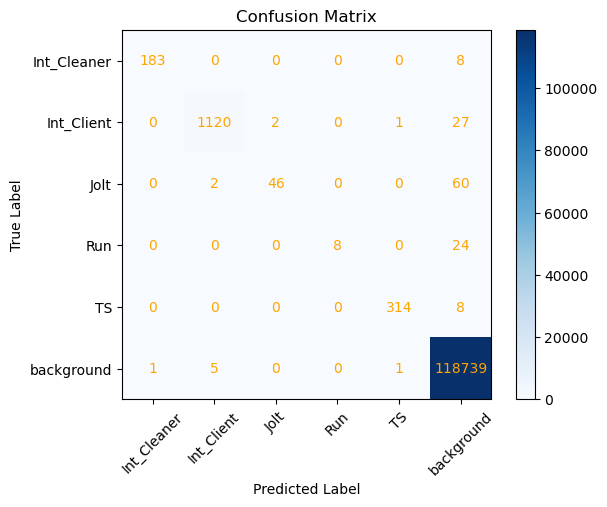

In [14]:
# Define the class labels
class_labels = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm = np.array(cm)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

## Now I want to test the independent data set

In [15]:
df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)
df_ind = df_ind.drop(0)
df_ind.index = df_ind.index -1    #Set the index rigth
df_ind = df_ind.drop(columns='bodyparts')

df_label_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encode.csv")
df_label_ind = df_label_ind.drop(columns='Unnamed: 0')
#print(file_path)

# Convert DataFrame into a single-column DataFrame
single_column_df_ind = pd.DataFrame(df_label_ind.idxmax(axis=1), columns=['Interaction'])

C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\2791102289.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)


In [16]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [17]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model.predict(X_ind_scaled)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9734149403640929


In [18]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[    0,     0,     0,   218],
       [    0,     0,     0,    84],
       [    0,     0,     0,   545],
       [    0,     0,     0, 31013]], dtype=int64)

## StandardScaler

In [19]:
X = merged_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y = merged_df.iloc[:, 0]     # Select column 0 as the target variable

In [20]:
from sklearn.preprocessing import PowerTransformer

# Create an instance of PowerTransformer
power_transformer = StandardScaler()

# Fit and transform the data
Xtransformed = power_transformer.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(Xtransformed, y, test_size=0.2, random_state=1999)

In [22]:
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [23]:
model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)

RandomForestClassifier()

In [24]:
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.998855237289401


In [25]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm = confusion_matrix(y_test, y_pred)

#print(cm)

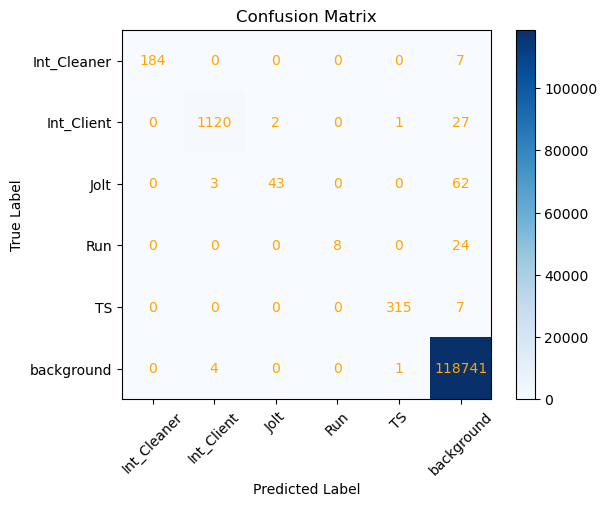

In [26]:
# Define the class labels
class_labels = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm = np.array(cm)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

## Now I want to test the independent data set

In [27]:
df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)
df_ind = df_ind.drop(0)
df_ind.index = df_ind.index -1    #Set the index rigth
df_ind = df_ind.drop(columns='bodyparts')

df_label_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encode.csv")
df_label_ind = df_label_ind.drop(columns='Unnamed: 0')
#print(file_path)

# Convert DataFrame into a single-column DataFrame
single_column_df_ind = pd.DataFrame(df_label_ind.idxmax(axis=1), columns=['Interaction'])

C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\2791102289.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)


In [28]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [29]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model.predict(X_ind_scaled)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9734149403640929


In [30]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[    0,     0,     0,   218],
       [    0,     0,     0,    84],
       [    0,     0,     0,   545],
       [    0,     0,     0, 31013]], dtype=int64)

## MinMaxScaler

In [31]:
X = merged_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y = merged_df.iloc[:, 0]     # Select column 0 as the target variable

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of PowerTransformer
power_transformer = MinMaxScaler()

# Fit and transform the data
Xtransformed = power_transformer.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(Xtransformed, y, test_size=0.2, random_state=1999)

In [34]:
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [35]:
model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)

RandomForestClassifier()

In [36]:
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9988303511435184


In [37]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm = confusion_matrix(y_test, y_pred)

#print(cm)

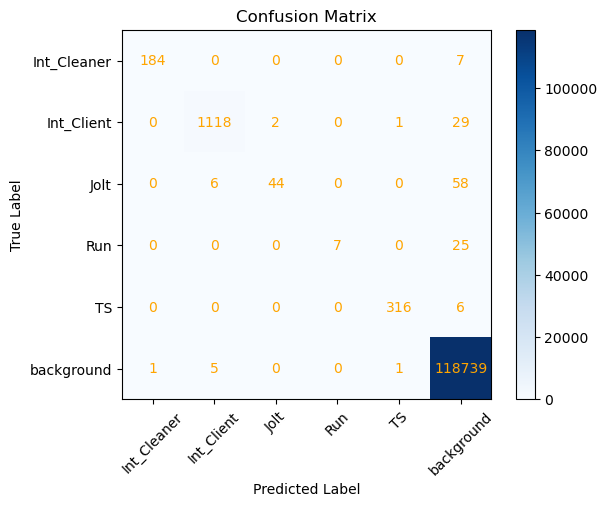

In [38]:
# Define the class labels
class_labels = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm = np.array(cm)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

## Now I want to test the independent data set

In [39]:
df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)
df_ind = df_ind.drop(0)
df_ind.index = df_ind.index -1    #Set the index rigth
df_ind = df_ind.drop(columns='bodyparts')

df_label_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encode.csv")
df_label_ind = df_label_ind.drop(columns='Unnamed: 0')
#print(file_path)

# Convert DataFrame into a single-column DataFrame
single_column_df_ind = pd.DataFrame(df_label_ind.idxmax(axis=1), columns=['Interaction'])

C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\2791102289.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)


In [40]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [41]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [42]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model.predict(X_ind_scaled)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9734149403640929


In [43]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[    0,     0,     0,   218],
       [    0,     0,     0,    84],
       [    0,     0,     0,   545],
       [    0,     0,     0, 31013]], dtype=int64)

---
---
---
---

# RandomForest (all Columns) with 5k backgrounds

## PowerTransformer

In [44]:
background_df = merged_df[merged_df['Interaction'] == 'background']
other_df = merged_df[merged_df['Interaction'] != 'background']

In [45]:
desired_background_samples = 5000

In [46]:
background_sample = background_df.sample(n=desired_background_samples, random_state=1999)

In [47]:
undersampled_df = pd.concat([background_sample, other_df], ignore_index=True)

In [48]:
interaction_counts_new = undersampled_df['Interaction'].value_counts()
print(interaction_counts_new)

Int_Client     5524
background     5000
TS             1474
Int_Cleaner     955
Jolt            490
Run             145
Name: Interaction, dtype: int64


In [49]:
X_new5000 = undersampled_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_new5000 = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [50]:
imputer = SimpleImputer(strategy='mean')

X_imputed_new5000 = imputer.fit_transform(X_new5000)

In [51]:
from sklearn.preprocessing import PowerTransformer

In [52]:
# Create an instance of PowerTransformer
power_transformer = PowerTransformer()

# Fit and transform the data
X_new5000_transformed = power_transformer.fit_transform(X_imputed_new5000)

In [53]:
X_train_new5000, X_test_new5000, y_train_new5000, y_test_new5000 = train_test_split(X_new5000_transformed, y_new5000, test_size=0.2, random_state=1999)

In [54]:
model_new5000 = RandomForestClassifier()
model_new5000.fit(X_train_new5000, y_train_new5000)

RandomForestClassifier()

In [55]:
y_pred_new5000 = model_new5000.predict(X_test_new5000)
accuracy_new5000 = accuracy_score(y_test_new5000, y_pred_new5000)
print("Accuracy:", accuracy_new5000)

Accuracy: 0.9871228844738779


In [56]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000 = confusion_matrix(y_test_new5000, y_pred_new5000)

#print(cm_new5000)

In [57]:
# Count the occurrences of each unique value
unique_values, value_counts = np.unique(y_pred_new5000, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, value_counts):
    print(f"{value}: {count}")

Int_Cleaner: 168
Int_Client: 1106
Jolt: 105
Run: 23
TS: 304
background: 1012


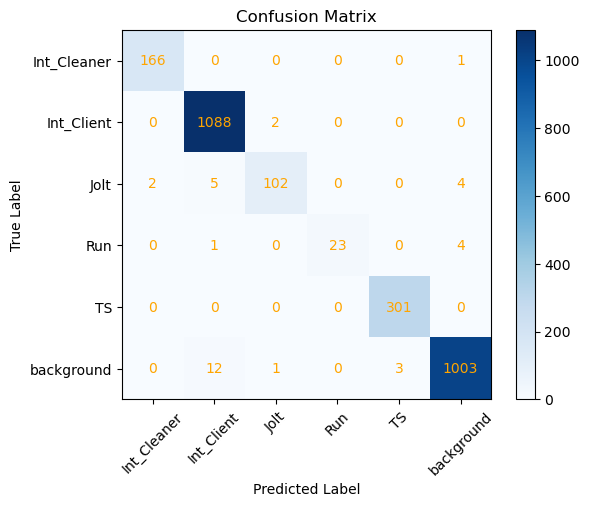

In [58]:
# Define the class labels
class_labels_new5000 = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000 = np.array(cm_new5000)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000)))
ax.set_yticks(np.arange(len(class_labels_new5000)))
ax.set_xticklabels(class_labels_new5000, rotation=45)
ax.set_yticklabels(class_labels_new5000)


# Add labels to each cell
for i in range(len(class_labels_new5000)):
    for j in range(len(class_labels_new5000)):
        text = ax.text(j, i, cm_new5000[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

## Now I want to test the independent data set

In [59]:
df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)
df_ind = df_ind.drop(0)
df_ind.index = df_ind.index -1    #Set the index rigth
df_ind = df_ind.drop(columns='bodyparts')

df_label_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encode.csv")
df_label_ind = df_label_ind.drop(columns='Unnamed: 0')
#print(file_path)

# Convert DataFrame into a single-column DataFrame
single_column_df_ind = pd.DataFrame(df_label_ind.idxmax(axis=1), columns=['Interaction'])

C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\2791102289.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)


In [60]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [61]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [62]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model_new5000.predict(X_ind_scaled)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.972693032015066


In [63]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[    0,     0,     0,   218],
       [    0,     0,     0,    84],
       [    0,     0,     0,   545],
       [   23,     0,     0, 30990]], dtype=int64)

In [64]:
#import pickle

In [65]:
# with open('saved_random_forest_model_new5000.pkl', 'wb') as file:
#     pickle.dump(model_new5000, file)

## StandardScaler

In [66]:
background_df = merged_df[merged_df['Interaction'] == 'background']
other_df = merged_df[merged_df['Interaction'] != 'background']

In [67]:
desired_background_samples = 5000

In [68]:
background_sample = background_df.sample(n=desired_background_samples, random_state=1999)

In [69]:
undersampled_df = pd.concat([background_sample, other_df], ignore_index=True)

In [70]:
interaction_counts_new = undersampled_df['Interaction'].value_counts()
print(interaction_counts_new)

Int_Client     5524
background     5000
TS             1474
Int_Cleaner     955
Jolt            490
Run             145
Name: Interaction, dtype: int64


In [71]:
X_new5000 = undersampled_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_new5000 = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [72]:
imputer = SimpleImputer(strategy='mean')

X_imputed_new5000 = imputer.fit_transform(X_new5000)

In [73]:
# Create an instance of PowerTransformer
power_transformer = StandardScaler()

# Fit and transform the data
X_new5000_transformed = power_transformer.fit_transform(X_imputed_new5000)

In [74]:
X_train_new5000, X_test_new5000, y_train_new5000, y_test_new5000 = train_test_split(X_new5000_transformed, y_new5000, test_size=0.2, random_state=1999)

In [75]:
model_new5000 = RandomForestClassifier()
model_new5000.fit(X_train_new5000, y_train_new5000)

RandomForestClassifier()

In [76]:
y_pred_new5000 = model_new5000.predict(X_test_new5000)
accuracy_new5000 = accuracy_score(y_test_new5000, y_pred_new5000)
print("Accuracy:", accuracy_new5000)

Accuracy: 0.9885945548197204


In [77]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000 = confusion_matrix(y_test_new5000, y_pred_new5000)

#print(cm_new5000)

In [78]:
# Count the occurrences of each unique value
unique_values, value_counts = np.unique(y_pred_new5000, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, value_counts):
    print(f"{value}: {count}")

Int_Cleaner: 168
Int_Client: 1106
Jolt: 104
Run: 24
TS: 305
background: 1011


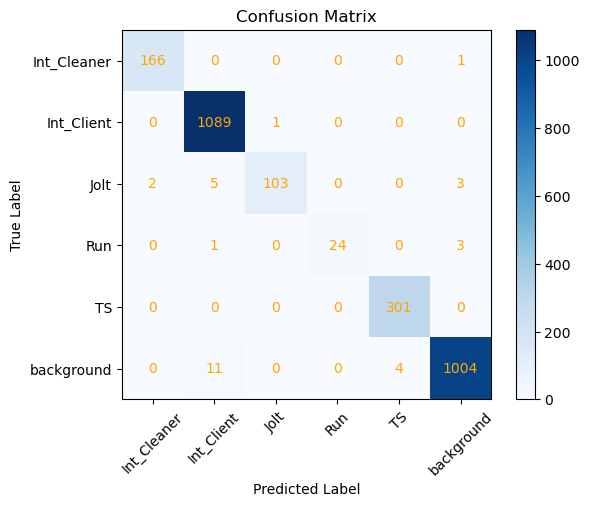

In [79]:
# Define the class labels
class_labels_new5000 = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000 = np.array(cm_new5000)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000)))
ax.set_yticks(np.arange(len(class_labels_new5000)))
ax.set_xticklabels(class_labels_new5000, rotation=45)
ax.set_yticklabels(class_labels_new5000)


# Add labels to each cell
for i in range(len(class_labels_new5000)):
    for j in range(len(class_labels_new5000)):
        text = ax.text(j, i, cm_new5000[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

## Now I want to test the independent data set

In [80]:
df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)
df_ind = df_ind.drop(0)
df_ind.index = df_ind.index -1    #Set the index rigth
df_ind = df_ind.drop(columns='bodyparts')

df_label_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encode.csv")
df_label_ind = df_label_ind.drop(columns='Unnamed: 0')
#print(file_path)

# Convert DataFrame into a single-column DataFrame
single_column_df_ind = pd.DataFrame(df_label_ind.idxmax(axis=1), columns=['Interaction'])

C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\2791102289.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)


In [81]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [82]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [83]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model_new5000.predict(X_ind_scaled)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.956120527306968


In [84]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[    0,     0,     0,     0,     0,   218],
       [    0,     0,     0,     0,     0,    84],
       [    0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,   545],
       [    0,     0,     0,     0,     0,     0],
       [   17,   494,    32,     0,     8, 30462]], dtype=int64)

## MinMaxScaler

In [85]:
background_df = merged_df[merged_df['Interaction'] == 'background']
other_df = merged_df[merged_df['Interaction'] != 'background']

In [86]:
desired_background_samples = 5000

In [87]:
background_sample = background_df.sample(n=desired_background_samples, random_state=1999)

In [88]:
undersampled_df = pd.concat([background_sample, other_df], ignore_index=True)

In [89]:
interaction_counts_new = undersampled_df['Interaction'].value_counts()
print(interaction_counts_new)

Int_Client     5524
background     5000
TS             1474
Int_Cleaner     955
Jolt            490
Run             145
Name: Interaction, dtype: int64


In [90]:
X_new5000 = undersampled_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_new5000 = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [91]:
imputer = SimpleImputer(strategy='mean')

X_imputed_new5000 = imputer.fit_transform(X_new5000)

In [92]:
# Create an instance of PowerTransformer
power_transformer = MinMaxScaler()

# Fit and transform the data
X_new5000_transformed = power_transformer.fit_transform(X_imputed_new5000)

In [93]:
X_train_new5000, X_test_new5000, y_train_new5000, y_test_new5000 = train_test_split(X_new5000_transformed, y_new5000, test_size=0.2, random_state=1999)

In [94]:
model_new5000 = RandomForestClassifier()
model_new5000.fit(X_train_new5000, y_train_new5000)

RandomForestClassifier()

In [95]:
y_pred_new5000 = model_new5000.predict(X_test_new5000)
accuracy_new5000 = accuracy_score(y_test_new5000, y_pred_new5000)
print("Accuracy:", accuracy_new5000)

Accuracy: 0.9878587196467992


In [96]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000 = confusion_matrix(y_test_new5000, y_pred_new5000)

#print(cm_new5000)

In [97]:
# Count the occurrences of each unique value
unique_values, value_counts = np.unique(y_pred_new5000, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, value_counts):
    print(f"{value}: {count}")

Int_Cleaner: 168
Int_Client: 1109
Jolt: 104
Run: 23
TS: 303
background: 1011


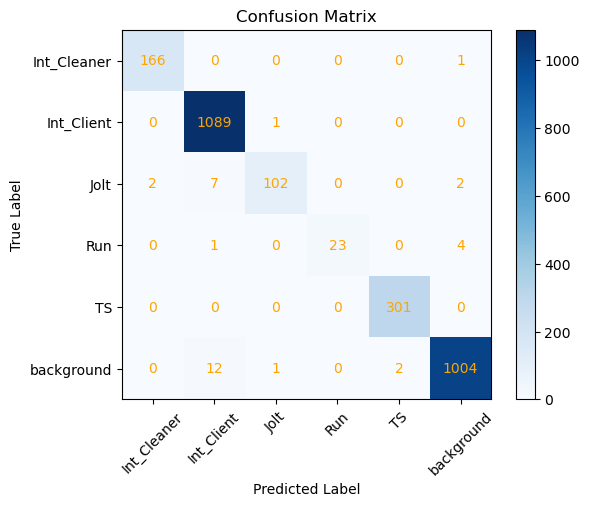

In [98]:
# Define the class labels
class_labels_new5000 = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000 = np.array(cm_new5000)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000)))
ax.set_yticks(np.arange(len(class_labels_new5000)))
ax.set_xticklabels(class_labels_new5000, rotation=45)
ax.set_yticklabels(class_labels_new5000)


# Add labels to each cell
for i in range(len(class_labels_new5000)):
    for j in range(len(class_labels_new5000)):
        text = ax.text(j, i, cm_new5000[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

## Now I want to test the independent data set

In [99]:
df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)
df_ind = df_ind.drop(0)
df_ind.index = df_ind.index -1    #Set the index rigth
df_ind = df_ind.drop(columns='bodyparts')

df_label_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encode.csv")
df_label_ind = df_label_ind.drop(columns='Unnamed: 0')
#print(file_path)

# Convert DataFrame into a single-column DataFrame
single_column_df_ind = pd.DataFrame(df_label_ind.idxmax(axis=1), columns=['Interaction'])

C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\2791102289.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)


In [100]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [101]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [102]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model_new5000.predict(X_ind_scaled)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9727244193345889


In [103]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[    0,     0,    10,     0,   208],
       [    0,     0,     0,     0,    84],
       [    0,     0,     0,     0,     0],
       [    0,     0,     0,     0,   545],
       [    0,    13,     9,     0, 30991]], dtype=int64)

---
---
---
---

# RandomForest (Columns likelihood out) with 5k backgrounds
+ Imputer = mean

## PowerTransformer

In [104]:
columns = [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23,25,26,28,29,31,32,34,35,37,38,40,41]

In [105]:
X_new5000_fs = undersampled_df.iloc[:, columns]  # Select columns 1 to 42 as features
y_new5000_fs = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [106]:
imputer = SimpleImputer(strategy='mean')

X_imputed_new5000_fs = imputer.fit_transform(X_new5000_fs)

In [107]:
# Create an instance of PowerTransformer
power_transformer = PowerTransformer()

# Fit and transform the data
X_scaled_new5000_fs = power_transformer.fit_transform(X_imputed_new5000_fs)

In [108]:
X_train_new5000_fs, X_test_new5000_fs, y_train_new5000_fs, y_test_new5000_fs = train_test_split(X_scaled_new5000_fs, y_new5000_fs, test_size=0.2, random_state=1999)

In [109]:
model_new5000_fs = RandomForestClassifier()
model_new5000_fs.fit(X_train_new5000_fs, y_train_new5000_fs)

RandomForestClassifier()

In [110]:
y_pred_new5000_fs = model_new5000_fs.predict(X_test_new5000_fs)
accuracy_new5000_fs = accuracy_score(y_test_new5000_fs, y_pred_new5000_fs)
print("Accuracy:", accuracy_new5000_fs)

Accuracy: 0.9900662251655629


In [111]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000_fs = confusion_matrix(y_test_new5000_fs, y_pred_new5000_fs)

#print(cm_new5000_featuresselection)

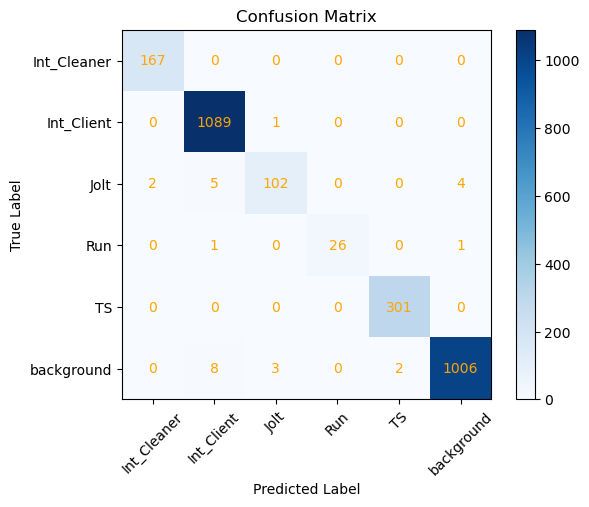

In [112]:
# Define the class labels
class_labels_new5000_fs = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000_fs = np.array(cm_new5000_fs)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000_fs, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000_fs)))
ax.set_yticks(np.arange(len(class_labels_new5000_fs)))
ax.set_xticklabels(class_labels_new5000_fs, rotation=45)
ax.set_yticklabels(class_labels_new5000_fs)


# Add labels to each cell
for i in range(len(class_labels_new5000_fs)):
    for j in range(len(class_labels_new5000_fs)):
        text = ax.text(j, i, cm_new5000_fs[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

## Now I want to test the independent data set

In [113]:
df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)
df_ind = df_ind.drop(0)
df_ind.index = df_ind.index -1    #Set the index rigth
df_ind = df_ind.drop(columns='bodyparts')
df_ind = df_ind.iloc[:, columns]

df_label_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encode.csv")
df_label_ind = df_label_ind.drop(columns='Unnamed: 0')
#print(file_path)

# Convert DataFrame into a single-column DataFrame
single_column_df_ind = pd.DataFrame(df_label_ind.idxmax(axis=1), columns=['Interaction'])

C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\2643661892.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)


In [114]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [115]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [116]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model_new5000_fs.predict(X_ind_scaled)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9734149403640929


In [117]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[    0,     0,     0,   218],
       [    0,     0,     0,    84],
       [    0,     0,     0,   545],
       [    0,     0,     0, 31013]], dtype=int64)

## StandardScaler

In [118]:
columns = [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23,25,26,28,29,31,32,34,35,37,38,40,41]

In [119]:
X_new5000_fs = undersampled_df.iloc[:, columns]  # Select columns 1 to 42 as features
y_new5000_fs = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [120]:
imputer = SimpleImputer(strategy='mean')

X_imputed_new5000_fs = imputer.fit_transform(X_new5000_fs)

In [121]:
# Create an instance of PowerTransformer
power_transformer = StandardScaler()

# Fit and transform the data
X_scaled_new5000_fs = power_transformer.fit_transform(X_imputed_new5000_fs)

In [122]:
X_train_new5000_fs, X_test_new5000_fs, y_train_new5000_fs, y_test_new5000_fs = train_test_split(X_scaled_new5000_fs, y_new5000_fs, test_size=0.2, random_state=1999)

In [123]:
model_new5000_fs = RandomForestClassifier()
model_new5000_fs.fit(X_train_new5000_fs, y_train_new5000_fs)

RandomForestClassifier()

In [124]:
y_pred_new5000_fs = model_new5000_fs.predict(X_test_new5000_fs)
accuracy_new5000_fs = accuracy_score(y_test_new5000_fs, y_pred_new5000_fs)
print("Accuracy:", accuracy_new5000_fs)

Accuracy: 0.9882266372332598


In [125]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000_fs = confusion_matrix(y_test_new5000_fs, y_pred_new5000_fs)

#print(cm_new5000_featuresselection)

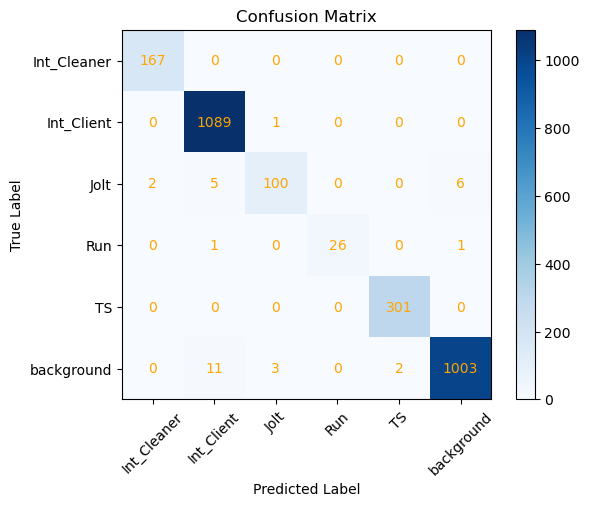

In [126]:
# Define the class labels
class_labels_new5000_fs = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000_fs = np.array(cm_new5000_fs)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000_fs, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000_fs)))
ax.set_yticks(np.arange(len(class_labels_new5000_fs)))
ax.set_xticklabels(class_labels_new5000_fs, rotation=45)
ax.set_yticklabels(class_labels_new5000_fs)


# Add labels to each cell
for i in range(len(class_labels_new5000_fs)):
    for j in range(len(class_labels_new5000_fs)):
        text = ax.text(j, i, cm_new5000_fs[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

## Now I want to test the independent data set

In [127]:
df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)
df_ind = df_ind.drop(0)
df_ind.index = df_ind.index -1    #Set the index rigth
df_ind = df_ind.drop(columns='bodyparts')
df_ind = df_ind.iloc[:, columns]

df_label_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encode.csv")
df_label_ind = df_label_ind.drop(columns='Unnamed: 0')
#print(file_path)

# Convert DataFrame into a single-column DataFrame
single_column_df_ind = pd.DataFrame(df_label_ind.idxmax(axis=1), columns=['Interaction'])

C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\2643661892.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)


In [128]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [129]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [130]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model_new5000_fs.predict(X_ind_scaled)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9734149403640929


In [131]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[    0,     0,     0,   218],
       [    0,     0,     0,    84],
       [    0,     0,     0,   545],
       [    0,     0,     0, 31013]], dtype=int64)

## MinMaxScaler

In [132]:
columns = [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23,25,26,28,29,31,32,34,35,37,38,40,41]

In [133]:
X_new5000_fs = undersampled_df.iloc[:, columns]  # Select columns 1 to 42 as features
y_new5000_fs = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [134]:
imputer = SimpleImputer(strategy='mean')

X_imputed_new5000_fs = imputer.fit_transform(X_new5000_fs)

In [135]:
# Create an instance of PowerTransformer
power_transformer = MinMaxScaler()

# Fit and transform the data
X_scaled_new5000_fs = power_transformer.fit_transform(X_imputed_new5000_fs)

In [136]:
X_train_new5000_fs, X_test_new5000_fs, y_train_new5000_fs, y_test_new5000_fs = train_test_split(X_scaled_new5000_fs, y_new5000_fs, test_size=0.2, random_state=1999)

In [137]:
model_new5000_fs = RandomForestClassifier()
model_new5000_fs.fit(X_train_new5000_fs, y_train_new5000_fs)

RandomForestClassifier()

In [138]:
y_pred_new5000_fs = model_new5000_fs.predict(X_test_new5000_fs)
accuracy_new5000_fs = accuracy_score(y_test_new5000_fs, y_pred_new5000_fs)
print("Accuracy:", accuracy_new5000_fs)

Accuracy: 0.9889624724061811


In [139]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000_fs = confusion_matrix(y_test_new5000_fs, y_pred_new5000_fs)

#print(cm_new5000_featuresselection)

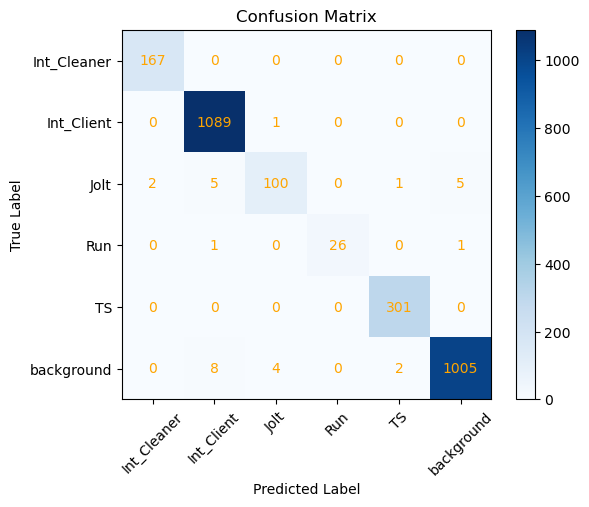

In [140]:
# Define the class labels
class_labels_new5000_fs = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000_fs = np.array(cm_new5000_fs)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000_fs, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000_fs)))
ax.set_yticks(np.arange(len(class_labels_new5000_fs)))
ax.set_xticklabels(class_labels_new5000_fs, rotation=45)
ax.set_yticklabels(class_labels_new5000_fs)


# Add labels to each cell
for i in range(len(class_labels_new5000_fs)):
    for j in range(len(class_labels_new5000_fs)):
        text = ax.text(j, i, cm_new5000_fs[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

## Now I want to test the independent data set

In [141]:
df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)
df_ind = df_ind.drop(0)
df_ind.index = df_ind.index -1    #Set the index rigth
df_ind = df_ind.drop(columns='bodyparts')
df_ind = df_ind.iloc[:, columns]

df_label_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encode.csv")
df_label_ind = df_label_ind.drop(columns='Unnamed: 0')
#print(file_path)

# Convert DataFrame into a single-column DataFrame
single_column_df_ind = pd.DataFrame(df_label_ind.idxmax(axis=1), columns=['Interaction'])

C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\2643661892.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)


In [142]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [143]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [144]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model_new5000_fs.predict(X_ind_scaled)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9734149403640929


In [145]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[    0,     0,     0,   218],
       [    0,     0,     0,    84],
       [    0,     0,     0,   545],
       [    0,     0,     0, 31013]], dtype=int64)

---
---
---
---

# RandomForest (Columns likelihood out) with 5k backgrounds
+ Imputer = KNNImputer

## PowerTransformer

In [188]:
columns = [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23,25,26,28,29,31,32,34,35,37,38,40,41]

In [189]:
X_new5000_fs = undersampled_df.iloc[:, columns]  # Select columns 1 to 42 as features
y_new5000_fs = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [190]:
imputer = KNNImputer(n_neighbors=5, weights='uniform')

X_imputed_new5000_fs = imputer.fit_transform(X_new5000_fs)

In [191]:
# Create an instance of PowerTransformer
power_transformer = PowerTransformer()

# Fit and transform the data
X_scaled_new5000_fs = power_transformer.fit_transform(X_imputed_new5000_fs)

In [192]:
X_train_new5000_fs, X_test_new5000_fs, y_train_new5000_fs, y_test_new5000_fs = train_test_split(X_scaled_new5000_fs, y_new5000_fs, test_size=0.2, random_state=1999)

In [193]:
model_new5000_fs = RandomForestClassifier()
model_new5000_fs.fit(X_train_new5000_fs, y_train_new5000_fs)

RandomForestClassifier()

In [194]:
y_pred_new5000_fs = model_new5000_fs.predict(X_test_new5000_fs)
accuracy_new5000_fs = accuracy_score(y_test_new5000_fs, y_pred_new5000_fs)
print("Accuracy:", accuracy_new5000_fs)

Accuracy: 0.9904341427520236


In [195]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000_fs = confusion_matrix(y_test_new5000_fs, y_pred_new5000_fs)

#print(cm_new5000_featuresselection)

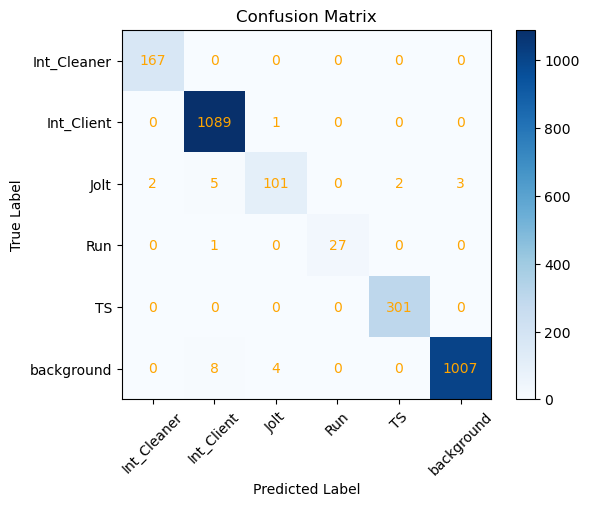

In [196]:
# Define the class labels
class_labels_new5000_fs = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000_fs = np.array(cm_new5000_fs)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000_fs, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000_fs)))
ax.set_yticks(np.arange(len(class_labels_new5000_fs)))
ax.set_xticklabels(class_labels_new5000_fs, rotation=45)
ax.set_yticklabels(class_labels_new5000_fs)


# Add labels to each cell
for i in range(len(class_labels_new5000_fs)):
    for j in range(len(class_labels_new5000_fs)):
        text = ax.text(j, i, cm_new5000_fs[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

## Now I want to test the independent data set

In [221]:
df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)
df_ind = df_ind.drop(0)
df_ind.index = df_ind.index -1    #Set the index rigth
df_ind = df_ind.drop(columns='bodyparts')

df_label_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encode.csv")
df_label_ind = df_label_ind.drop(columns='Unnamed: 0')
#print(file_path)

# Convert DataFrame into a single-column DataFrame
single_column_df_ind = pd.DataFrame(df_label_ind.idxmax(axis=1), columns=['Interaction'])

C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\2791102289.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)


In [224]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, columns]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [225]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model_new5000_fs.predict(X_ind_scaled)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9728185812931576


In [226]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[    0,    46,     1,     0,   171],
       [    0,     0,     0,     0,    84],
       [    0,     0,     0,     0,     0],
       [    0,     0,     0,     0,   545],
       [   19,     0,     0,     0, 30994]], dtype=int64)

## StandardScaler

In [227]:
columns = [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23,25,26,28,29,31,32,34,35,37,38,40,41]

In [228]:
X_new5000_fs = undersampled_df.iloc[:, columns]  # Select columns 1 to 42 as features
y_new5000_fs = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [229]:
imputer = SimpleImputer(strategy='mean')

X_imputed_new5000_fs = imputer.fit_transform(X_new5000_fs)

In [230]:
# Create an instance of PowerTransformer
power_transformer = StandardScaler()

# Fit and transform the data
X_scaled_new5000_fs = power_transformer.fit_transform(X_imputed_new5000_fs)

In [231]:
X_train_new5000_fs, X_test_new5000_fs, y_train_new5000_fs, y_test_new5000_fs = train_test_split(X_scaled_new5000_fs, y_new5000_fs, test_size=0.2, random_state=1999)

In [232]:
model_new5000_fs = RandomForestClassifier()
model_new5000_fs.fit(X_train_new5000_fs, y_train_new5000_fs)

RandomForestClassifier()

In [233]:
y_pred_new5000_fs = model_new5000_fs.predict(X_test_new5000_fs)
accuracy_new5000_fs = accuracy_score(y_test_new5000_fs, y_pred_new5000_fs)
print("Accuracy:", accuracy_new5000_fs)

Accuracy: 0.9889624724061811


In [234]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000_fs = confusion_matrix(y_test_new5000_fs, y_pred_new5000_fs)

#print(cm_new5000_featuresselection)

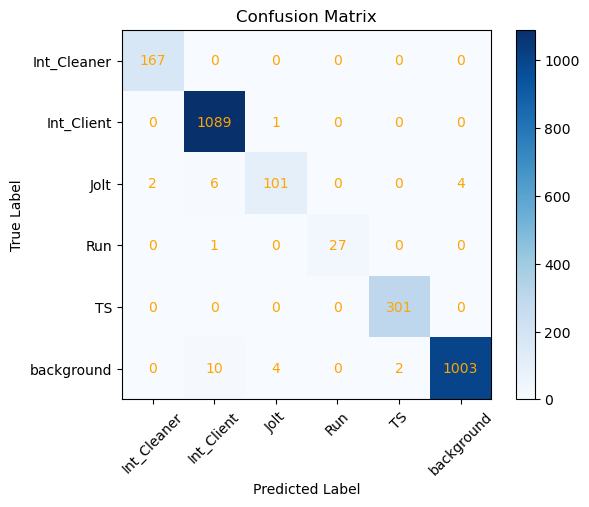

In [235]:
# Define the class labels
class_labels_new5000_fs = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000_fs = np.array(cm_new5000_fs)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000_fs, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000_fs)))
ax.set_yticks(np.arange(len(class_labels_new5000_fs)))
ax.set_xticklabels(class_labels_new5000_fs, rotation=45)
ax.set_yticklabels(class_labels_new5000_fs)


# Add labels to each cell
for i in range(len(class_labels_new5000_fs)):
    for j in range(len(class_labels_new5000_fs)):
        text = ax.text(j, i, cm_new5000_fs[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

## Now I want to test the independent data set

In [236]:
df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)
df_ind = df_ind.drop(0)
df_ind.index = df_ind.index -1    #Set the index rigth
df_ind = df_ind.drop(columns='bodyparts')

df_label_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encode.csv")
df_label_ind = df_label_ind.drop(columns='Unnamed: 0')
#print(file_path)

# Convert DataFrame into a single-column DataFrame
single_column_df_ind = pd.DataFrame(df_label_ind.idxmax(axis=1), columns=['Interaction'])

C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\2791102289.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)


In [237]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, columns]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [238]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model_new5000_fs.predict(X_ind_scaled)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9538292529817953


In [239]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[    0,     0,     0,     0,     0,   218],
       [    0,     0,     0,     0,     0,    84],
       [    0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,   545],
       [    0,     0,     0,     0,     0,     0],
       [   17,   485,    31,     0,    91, 30389]], dtype=int64)

## MinMaxScaler

In [240]:
columns = [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23,25,26,28,29,31,32,34,35,37,38,40,41]

In [241]:
X_new5000_fs = undersampled_df.iloc[:, columns]  # Select columns 1 to 42 as features
y_new5000_fs = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [242]:
imputer = SimpleImputer(strategy='mean')

X_imputed_new5000_fs = imputer.fit_transform(X_new5000_fs)

In [243]:
# Create an instance of PowerTransformer
power_transformer = MinMaxScaler()

# Fit and transform the data
X_scaled_new5000_fs = power_transformer.fit_transform(X_imputed_new5000_fs)

In [244]:
X_train_new5000_fs, X_test_new5000_fs, y_train_new5000_fs, y_test_new5000_fs = train_test_split(X_scaled_new5000_fs, y_new5000_fs, test_size=0.2, random_state=1999)

In [245]:
model_new5000_fs = RandomForestClassifier()
model_new5000_fs.fit(X_train_new5000_fs, y_train_new5000_fs)

RandomForestClassifier()

In [246]:
y_pred_new5000_fs = model_new5000_fs.predict(X_test_new5000_fs)
accuracy_new5000_fs = accuracy_score(y_test_new5000_fs, y_pred_new5000_fs)
print("Accuracy:", accuracy_new5000_fs)

Accuracy: 0.9889624724061811


In [247]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000_fs = confusion_matrix(y_test_new5000_fs, y_pred_new5000_fs)

#print(cm_new5000_featuresselection)

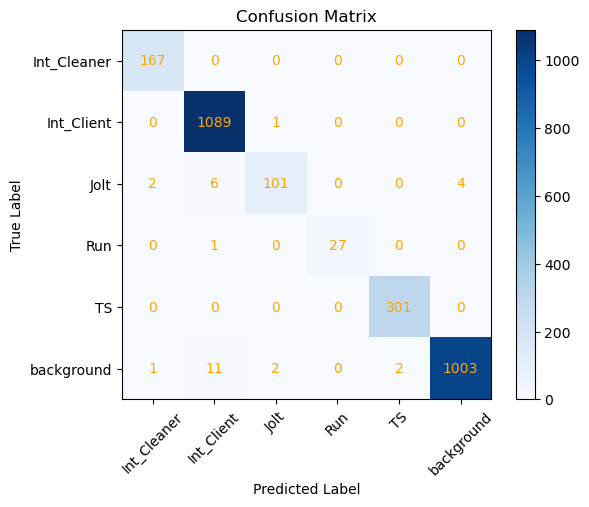

In [248]:
# Define the class labels
class_labels_new5000_fs = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000_fs = np.array(cm_new5000_fs)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000_fs, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000_fs)))
ax.set_yticks(np.arange(len(class_labels_new5000_fs)))
ax.set_xticklabels(class_labels_new5000_fs, rotation=45)
ax.set_yticklabels(class_labels_new5000_fs)


# Add labels to each cell
for i in range(len(class_labels_new5000_fs)):
    for j in range(len(class_labels_new5000_fs)):
        text = ax.text(j, i, cm_new5000_fs[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

## Now I want to test the independent data set

In [252]:
df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)
df_ind = df_ind.drop(0)
df_ind.index = df_ind.index -1    #Set the index rigth
df_ind = df_ind.drop(columns='bodyparts')

df_label_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encode.csv")
df_label_ind = df_label_ind.drop(columns='Unnamed: 0')
#print(file_path)

# Convert DataFrame into a single-column DataFrame
single_column_df_ind = pd.DataFrame(df_label_ind.idxmax(axis=1), columns=['Interaction'])

C:\Users\raulo\AppData\Local\Temp\ipykernel_1752\2791102289.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\ocean_L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)


In [253]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

merged_df_ind = labeled_df_ind

X_ind = merged_df_ind.iloc[:, columns]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

X_ind_imputed = imputer.fit_transform(X_ind)

X_ind_scaled = power_transformer.fit_transform(X_ind_imputed)

In [254]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model_new5000_fs.predict(X_ind_scaled)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9697112366603892


In [255]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model_new5000_fs.predict(X_ind_scaled)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9697112366603892


In [256]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[    0,     0,     0,     0,     0,   218],
       [    0,     0,     0,     0,     0,    84],
       [    0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,   545],
       [    0,     0,     0,     0,     0,     0],
       [    0,     8,    10,     0,   100, 30895]], dtype=int64)